In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [2]:
c_data = pd.read_csv('C:/Users/trong/Desktop/DoAnDataMining/BankChurners.csv')
c_data = c_data[c_data.columns[:-2]]
c_data.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  

[3 rows x 21 columns]

In [3]:
df_filtered= c_data.replace('Unknown', np.nan)
df_filtered.dropna(inplace=True)
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.head(18)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   709106358  Existing Customer            40      M                3   
4   713061558  Existing Customer            44      M                2   
5   710930508  Existing Customer            37      M                3   
6   719661558  Existing Customer            48      M                2   
7   710599683  Existing Customer            56      M                1   
8   712396908  Existing Customer            57      F                2   
9   709967358  Existing Customer            48      M                4   
10  806160108  Existing Customer            61      M                1   
11  806165208  Existing Customer            47      M                1   
12  708508758  Attrited Customer            62      F                0   
13  784725333  Existing Customer            41      M                3   
14  771071958  Existing Customer            41      F                3   
15  806624208  Existing Customer            47      M                4   
16  712991808  Existing Customer            53      M                2   
17  709029408  Existing Customer            41      M                4   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3       Uneducated        Married     $60K - $80K          Blue   
4         Graduate        Married     $40K - $60K          Blue   
5       Uneducated         Single     $60K - $80K          Blue   
6         Graduate         Single    $80K - $120K          Blue   
7          College         Single    $80K - $120K          Blue   
8         Graduate        Married  Less than $40K          Blue   
9    Post-Graduate         Single    $80K - $120K          Blue   
10     High School        Married     $40K - $60K          Blue   
11       Doctorate       Divorced     $60K - $80K          Blue   
12        Graduate        Married  Less than $40K          Blue   
13     High School        Married     $40K - $60K          Blue   
14        Graduate         Single  Less than $40K          Blue   
15     High School        Married     $40K - $60K          Blue   
16      Uneducated        Married     $60K - $80K          Blue   
17        Graduate        Married     $60K - $80K          Blue   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               39  ...                       1                      3   
1               44  ...                       1                      2   
2               36  ...                       1                      0   
3               21  ...                       1                      0   
4               36  ...                       1                      2   
5               36  ...                       2                      0   
6               36  ...                       3                      3   
7               36  ...                       6                      0   
8               48  ...                       2                      2   
9               36  ...                       2                      3   
10              56  ...                       2                      3   
11              42  ...                       2                      0   
12              49  ...                       3                      3   
13              33  ...                       2                      1   
14              28  ...                       1                      2   
15              42  ...                       0                      0   
16              48  ...                       5                  

In [4]:
df_transform=df_filtered.copy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in df_transform.columns[[i==object for i in df_transform.dtypes]]:
    df_transform.loc[:,col]= label_encoder.fit_transform(df_transform[col])
df_transform.head(18)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0   768805383               1            45       1                3   
1   818770008               1            49       0                5   
2   713982108               1            51       1                3   
3   709106358               1            40       1                3   
4   713061558               1            44       1                2   
5   710930508               1            37       1                3   
6   719661558               1            48       1                2   
7   710599683               1            56       1                1   
8   712396908               1            57       0                2   
9   709967358               1            48       1                4   
10  806160108               1            61       1                1   
11  806165208               1            47       1                1   
12  708508758               0            62       0                0   
13  784725333               1            41       1                3   
14  771071958               1            41       0                3   
15  806624208               1            47       1                4   
16  712991808               1            53       1                2   
17  709029408               1            41       1                4   

    Education_Level  Marital_Status  Income_Category  Card_Category  \
0                 3               1                2              0   
1                 2               2                4              0   
2                 2               1                3              0   
3                 5               1                2              0   
4                 2               1                1              0   
5                 5               2                2              0   
6                 2               2                3              0   
7                 0               2                3              0   
8                 2               1                4              0   
9                 4               2                3              0   
10                3               1                1              0   
11                1               0                2              0   
12                2               1                4              0   
13                3               1                1              0   
14                2               2                4              0   
15                3               1                1              0   
16                5               1                2              0   
17                2               1                2              0   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               39  ...                       1                      3   
1               44  ...                       1                      2   
2               36  ...                       1                      0   
3               21  ...                       1                      0   
4               36  ...                       1                      2   
5               36  ...                       2                      0   
6               36  ...                       3                      3   
7               36  ...                       6                      0   
8               48  ...                       2                      2   
9               36  ...                       2                      3   
10              56  ...                       2                      3   
11              42  ...                       2                      0   
12              49  ...                       3                      3   
13              33  ...                       2                      1   
14              28  ...                       1                      2   
15              42  ...                       0                      0   
16              48  ...    

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

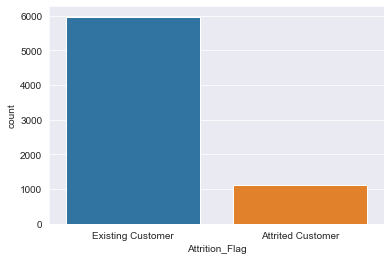

In [5]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.countplot(df_filtered['Attrition_Flag'], label ='Count')

In [6]:
def corr_2_cols (Col1, Col2):
    res = df_filtered.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    plot = res.plot(kind='bar', stacked =True)
    return res, plot


(Attrition_Flag   Attrited Customer  Existing Customer      perc
 Dependent_count                                                
 0                              101                535  0.841195
 1                              184               1090  0.855573
 2                              285               1595  0.848404
 3                              329               1600  0.829445
 4                              171                906  0.841226
 5                               43                242  0.849123,
 <AxesSubplot:xlabel='Dependent_count'>)

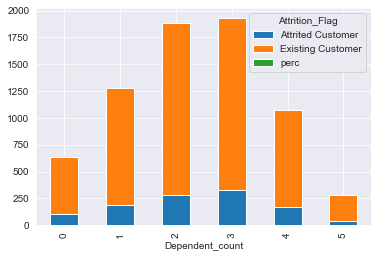

In [7]:
#Không cần thiết
corr_2_cols('Dependent_count','Attrition_Flag')

(Attrition_Flag   Attrited Customer  Existing Customer      perc
 Education_Level                                                
 College                        132                712  0.843602
 Doctorate                       75                283  0.790503
 Graduate                       406               2185  0.843304
 High School                    237               1416  0.856624
 Post-Graduate                   77                354  0.821346
 Uneducated                     186               1018  0.845515,
 <AxesSubplot:xlabel='Education_Level'>)

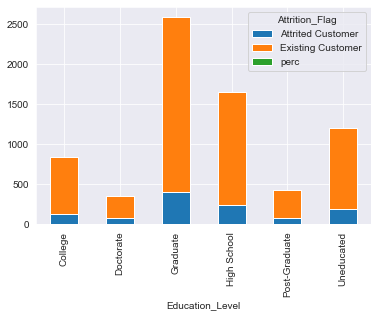

In [8]:
corr_2_cols('Education_Level','Attrition_Flag')

(Attrition_Flag  Attrited Customer  Existing Customer      perc
 Marital_Status                                                
 Divorced                       92                477  0.838313
 Married                       529               3035  0.851571
 Single                        492               2456  0.833107,
 <AxesSubplot:xlabel='Marital_Status'>)

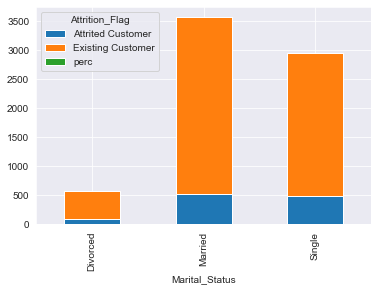

In [9]:
corr_2_cols('Marital_Status','Attrition_Flag')

(Attrition_Flag   Attrited Customer  Existing Customer      perc
 Income_Category                                                
 $120K +                        102                470  0.821678
 $40K - $60K                    204               1208  0.855524
 $60K - $80K                    145                958  0.868540
 $80K - $120K                   189               1013  0.842762
 Less than $40K                 473               2319  0.830587,
 <AxesSubplot:xlabel='Income_Category'>)

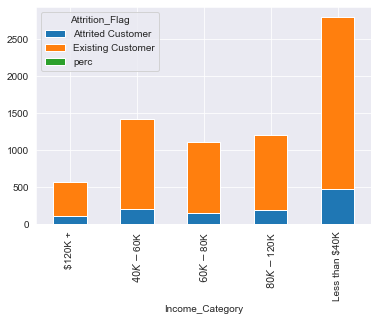

In [10]:
corr_2_cols('Income_Category','Attrition_Flag')

(Attrition_Flag  Attrited Customer  Existing Customer      perc
 Card_Category                                                 
 Blue                         1034               5564  0.843286
 Gold                           13                 68  0.839506
 Platinum                        3                  8  0.727273
 Silver                         63                328  0.838875,
 <AxesSubplot:xlabel='Card_Category'>)

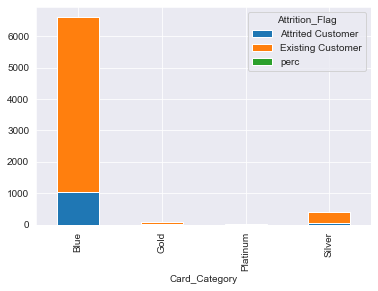

In [11]:
corr_2_cols('Card_Category','Attrition_Flag')

(Attrition_Flag            Attrited Customer  Existing Customer      perc
 Total_Relationship_Count                                                
 1                                       158                469  0.748006
 2                                       236                612  0.721698
 3                                       277               1340  0.828695
 4                                       141               1209  0.895556
 5                                       160               1203  0.882612
 6                                       141               1135  0.889498,
 <AxesSubplot:xlabel='Total_Relationship_Count'>)

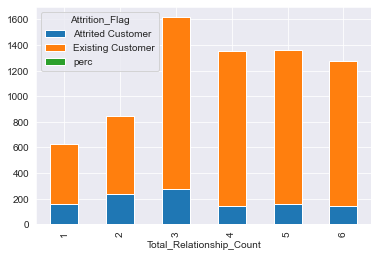

In [12]:
corr_2_cols('Total_Relationship_Count','Attrition_Flag')

(Attrition_Flag  Attrited Customer  Existing Customer      perc
 Months_on_book                                                
 13                              6                 33  0.846154
 14                              1                  9  0.900000
 15                              7                 14  0.666667
 16                              1                 18  0.947368
 17                              3                 29  0.906250
 18                              8                 32  0.800000
 19                              6                 39  0.866667
 20                              9                 46  0.836364
 21                              8                 53  0.868852
 22                             11                 59  0.842857
 23                             11                 74  0.870588
 24                             16                 92  0.851852
 25                             23                 96  0.806723
 26                             16      

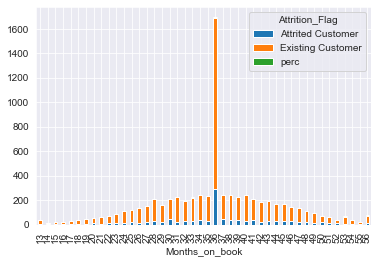

In [13]:
#Không cần thiết
corr_2_cols('Months_on_book','Attrition_Flag')

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#Thực hiện tách cột thuộc tính nhãn của cột Attrition Flag. Biến x chứa các thuộc tính bình thường, 
#y là biến labels chứa thuộc tính của Attrition Flag
x = df_transform.drop('Attrition_Flag',axis=1)
y = df_transform['Attrition_Flag']

In [16]:
#Tách dữ liệu thành 2 phần, test và train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


Highest Accuracy Score : 84.4235294117647% with k = [11]
Time 3.0844058990478516
Accuracy 0.8442352941176471
Report               precision    recall  f1-score   support

           0       0.12      0.00      0.01       330
           1       0.84      1.00      0.91      1795

    accuracy                           0.84      2125
   macro avg       0.48      0.50      0.46      2125
weighted avg       0.73      0.84      0.77      2125



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 0.8442352941176471')

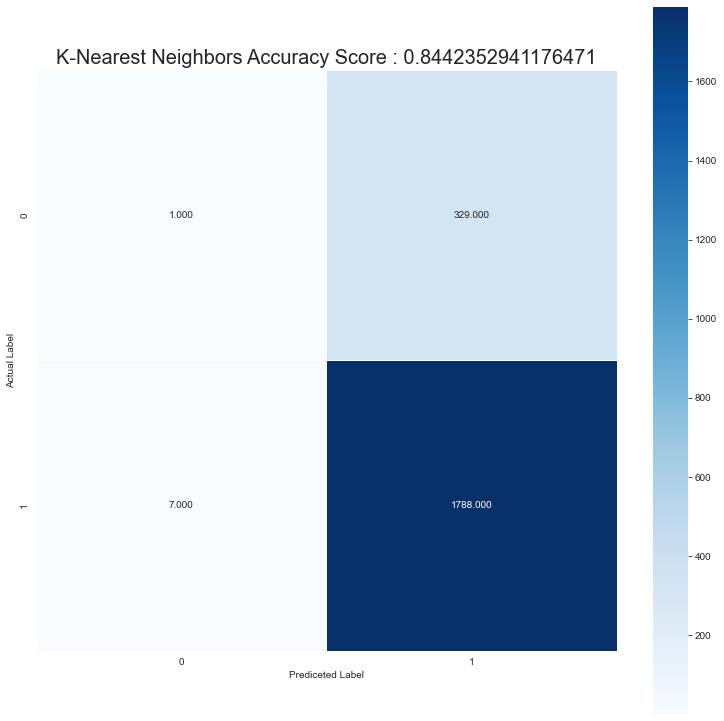

In [17]:
#Khanh làm KNearest
from sklearn.neighbors import KNeighborsClassifier
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
start_knn = time.time()
knn_scores =  []

for i in range (1,13):
    knc = KNeighborsClassifier(i)
    knn_pred = knc.fit(X_train, y_train).predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, knn_pred))
    max_knn_score = max (knn_scores)
knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn =time.time()
print('Highest Accuracy Score : {}% with k = {}'.format(max_knn_score*100, list(map(lambda x: x + 1, knn_score_ind))))
print ('Time', end_knn - start_knn)
knn_score = max_knn_score
print("Accuracy", knn_score)
print("Report", metrics.classification_report(y_test, knn_pred))

knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(13,13))
ax = sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Prediceted Label')
title = 'K-Nearest Neighbors Accuracy Score : {0}'.format(knn_score)
plt.title(title, size =20)

time 0.748720645904541
Accuracy 0.9590588235294117
Report               precision    recall  f1-score   support

           0       0.93      0.80      0.86       330
           1       0.96      0.99      0.98      1795

    accuracy                           0.96      2125
   macro avg       0.95      0.89      0.92      2125
weighted avg       0.96      0.96      0.96      2125



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.9590588235294117')

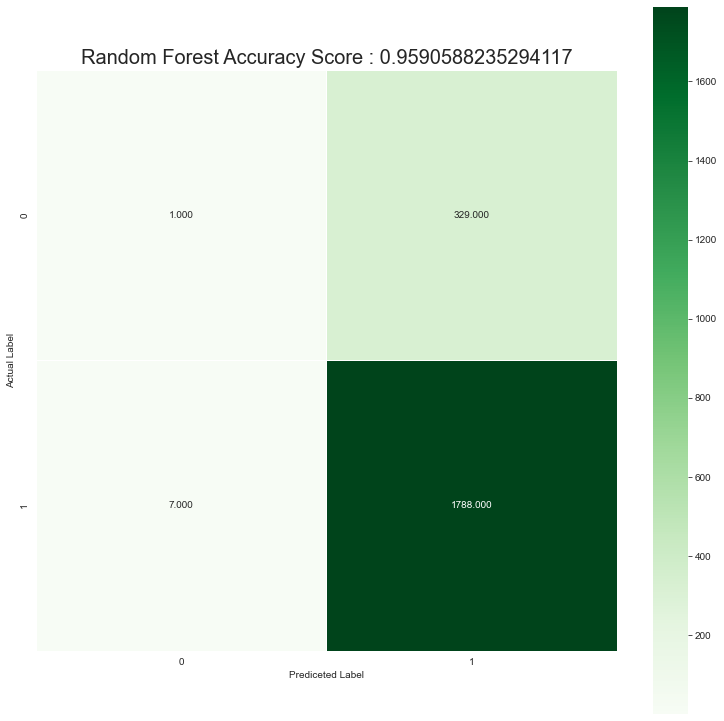

In [18]:
#Khanh làm RandomForest
from sklearn.ensemble import RandomForestClassifier
import time
rfc = RandomForestClassifier()
start_rf =time.time()
rf_pred = rfc.fit(X_train, y_train).predict(X_test)
end_rf= time.time()
print ("time", end_rf - start_rf)

rf_score = metrics.accuracy_score(y_test, rf_pred)
print("Accuracy", rf_score)
print("Report", metrics.classification_report(y_test, rf_pred))

rf_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(13,13))
ax =sns.heatmap(rf_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Prediceted Label')
title = 'Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title, size =20)

In [19]:
#Khang, Decision Tree (ID3)
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tree = time.time()
id3_pred = clf.fit(X_train, y_train).predict(X_test)
end_tree = time.time()
#times['id3'] = timedelta(seconds=round(end_tree - start_tree,4)).total_seconds()
print("Time decision tree (ID3)",end_tree-start_tree)

Time decision tree (ID3) 0.04492378234863281


In [20]:
#Khang, Decision Tree (ID3)
id3_score = metrics.accuracy_score(y_test, id3_pred)
#accuracies['ID3'] = id3_score
print("Accuracy",id3_score)
print("Report",metrics.classification_report(y_test,id3_pred))

Accuracy 0.9388235294117647
Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80       330
           1       0.96      0.96      0.96      1795

    accuracy                           0.94      2125
   macro avg       0.88      0.89      0.88      2125
weighted avg       0.94      0.94      0.94      2125



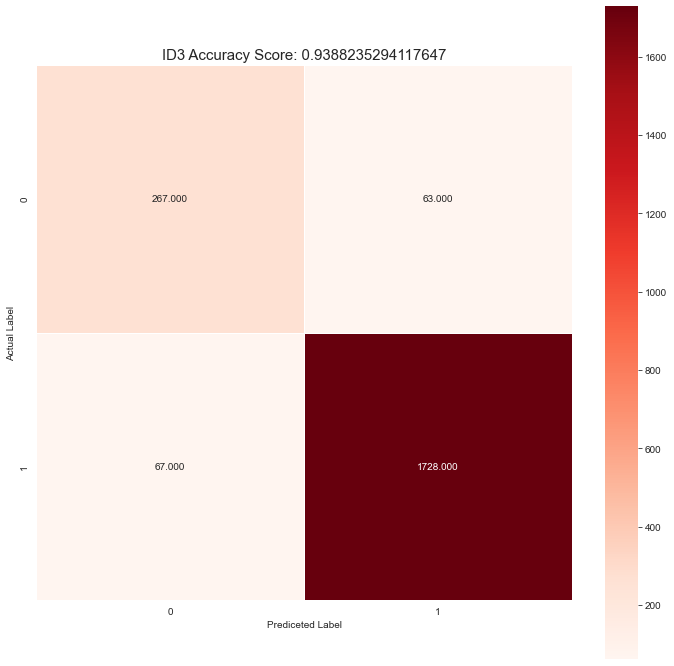

In [21]:
#Khang, Decision Tree (ID3)
id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(12,12))
ax=sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Prediceted Label')
title = 'ID3 Accuracy Score: {0}'.format(id3_score)
plt.title(title,size=15)
plt.show()

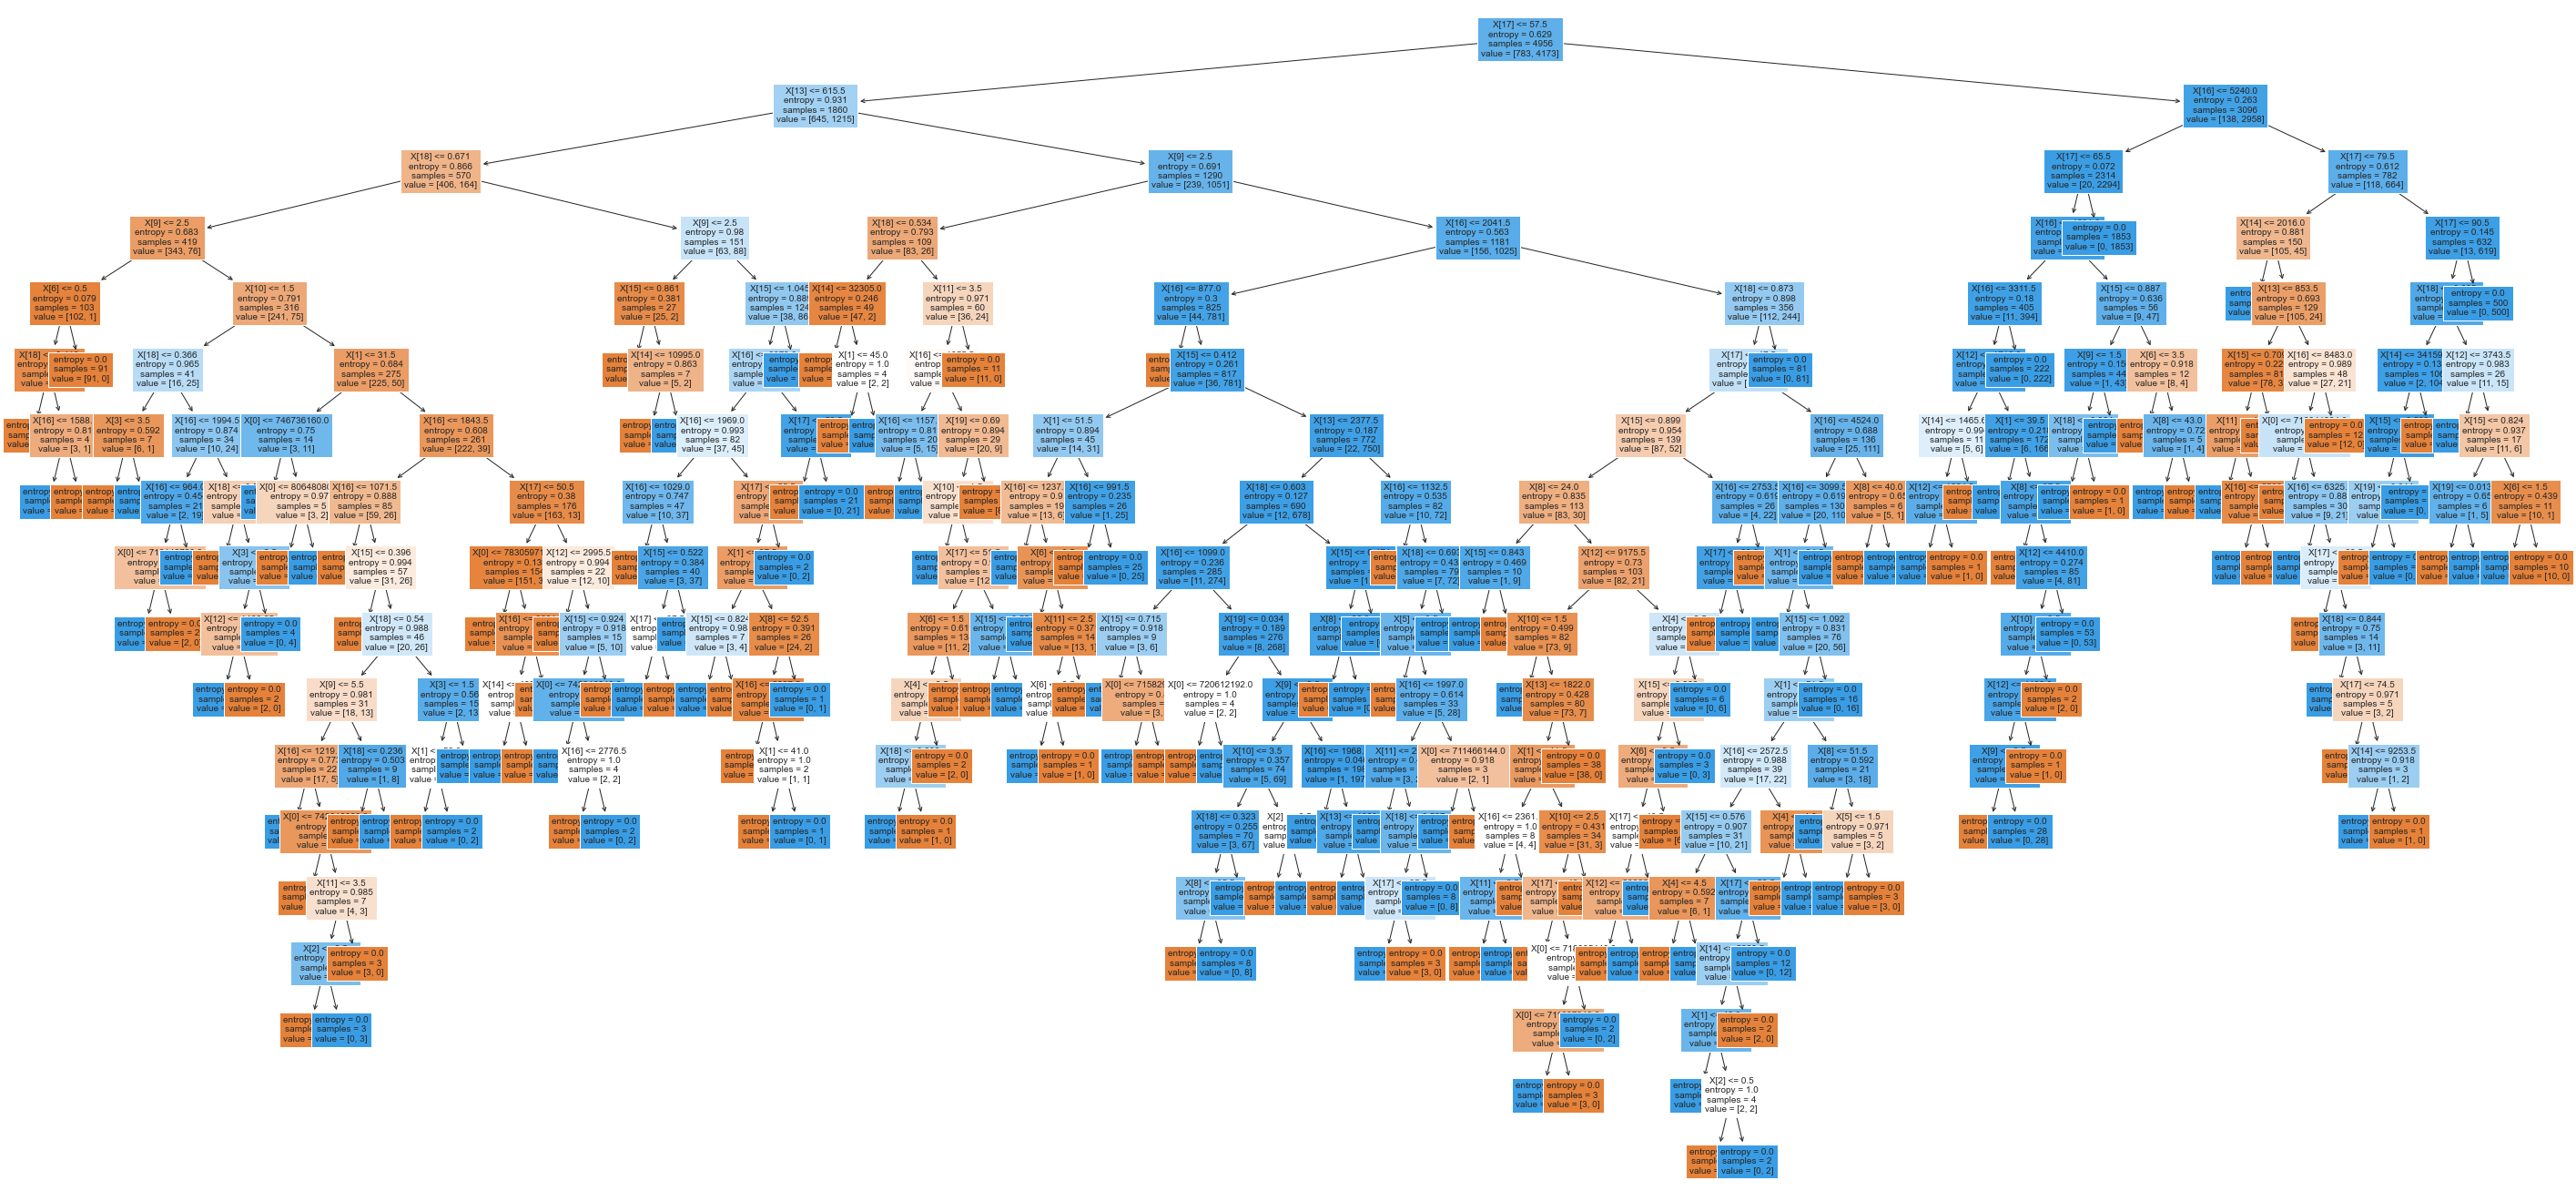

In [22]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [23]:
#Khang, Decision Tree (CART)
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

start_cart = time.time()
cart_pred = clf1.fit(X_train, y_train).predict(X_test)
end_cart = time.time()
print("Time decision tree (CART)",end_cart-start_cart)

Time decision tree (CART) 0.04666614532470703


In [24]:
#Khang, Decision Tree (CART)
cart_score = metrics.accuracy_score(y_test, cart_pred)
#accuracies['CART'] = id3_score
print("Accuracy",cart_score)
print("Report",metrics.classification_report(y_test,cart_pred))

Accuracy 0.9312941176470588
Report               precision    recall  f1-score   support

           0       0.78      0.78      0.78       330
           1       0.96      0.96      0.96      1795

    accuracy                           0.93      2125
   macro avg       0.87      0.87      0.87      2125
weighted avg       0.93      0.93      0.93      2125



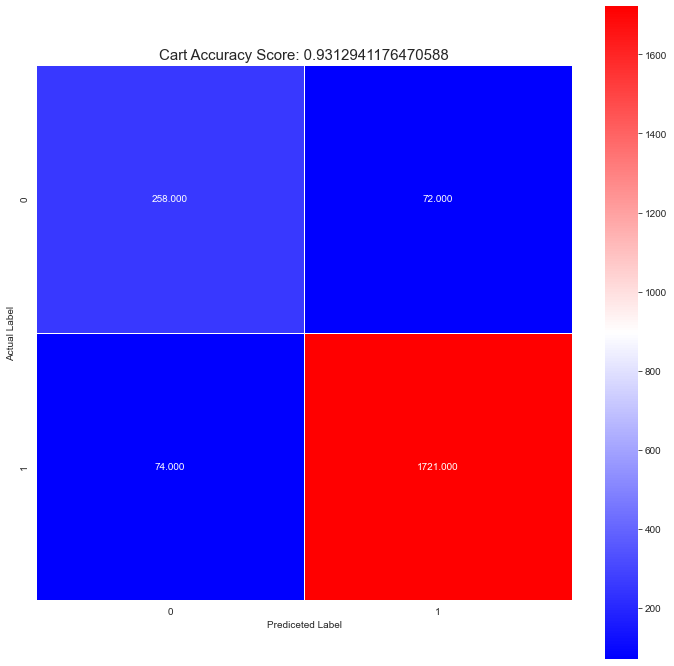

In [25]:
#Khang, Decision Tree (CART)
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
ax =sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='bwr')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Prediceted Label')
title = 'Cart Accuracy Score: {0}'.format(cart_score)
plt.title(title,size=15)
plt.show()

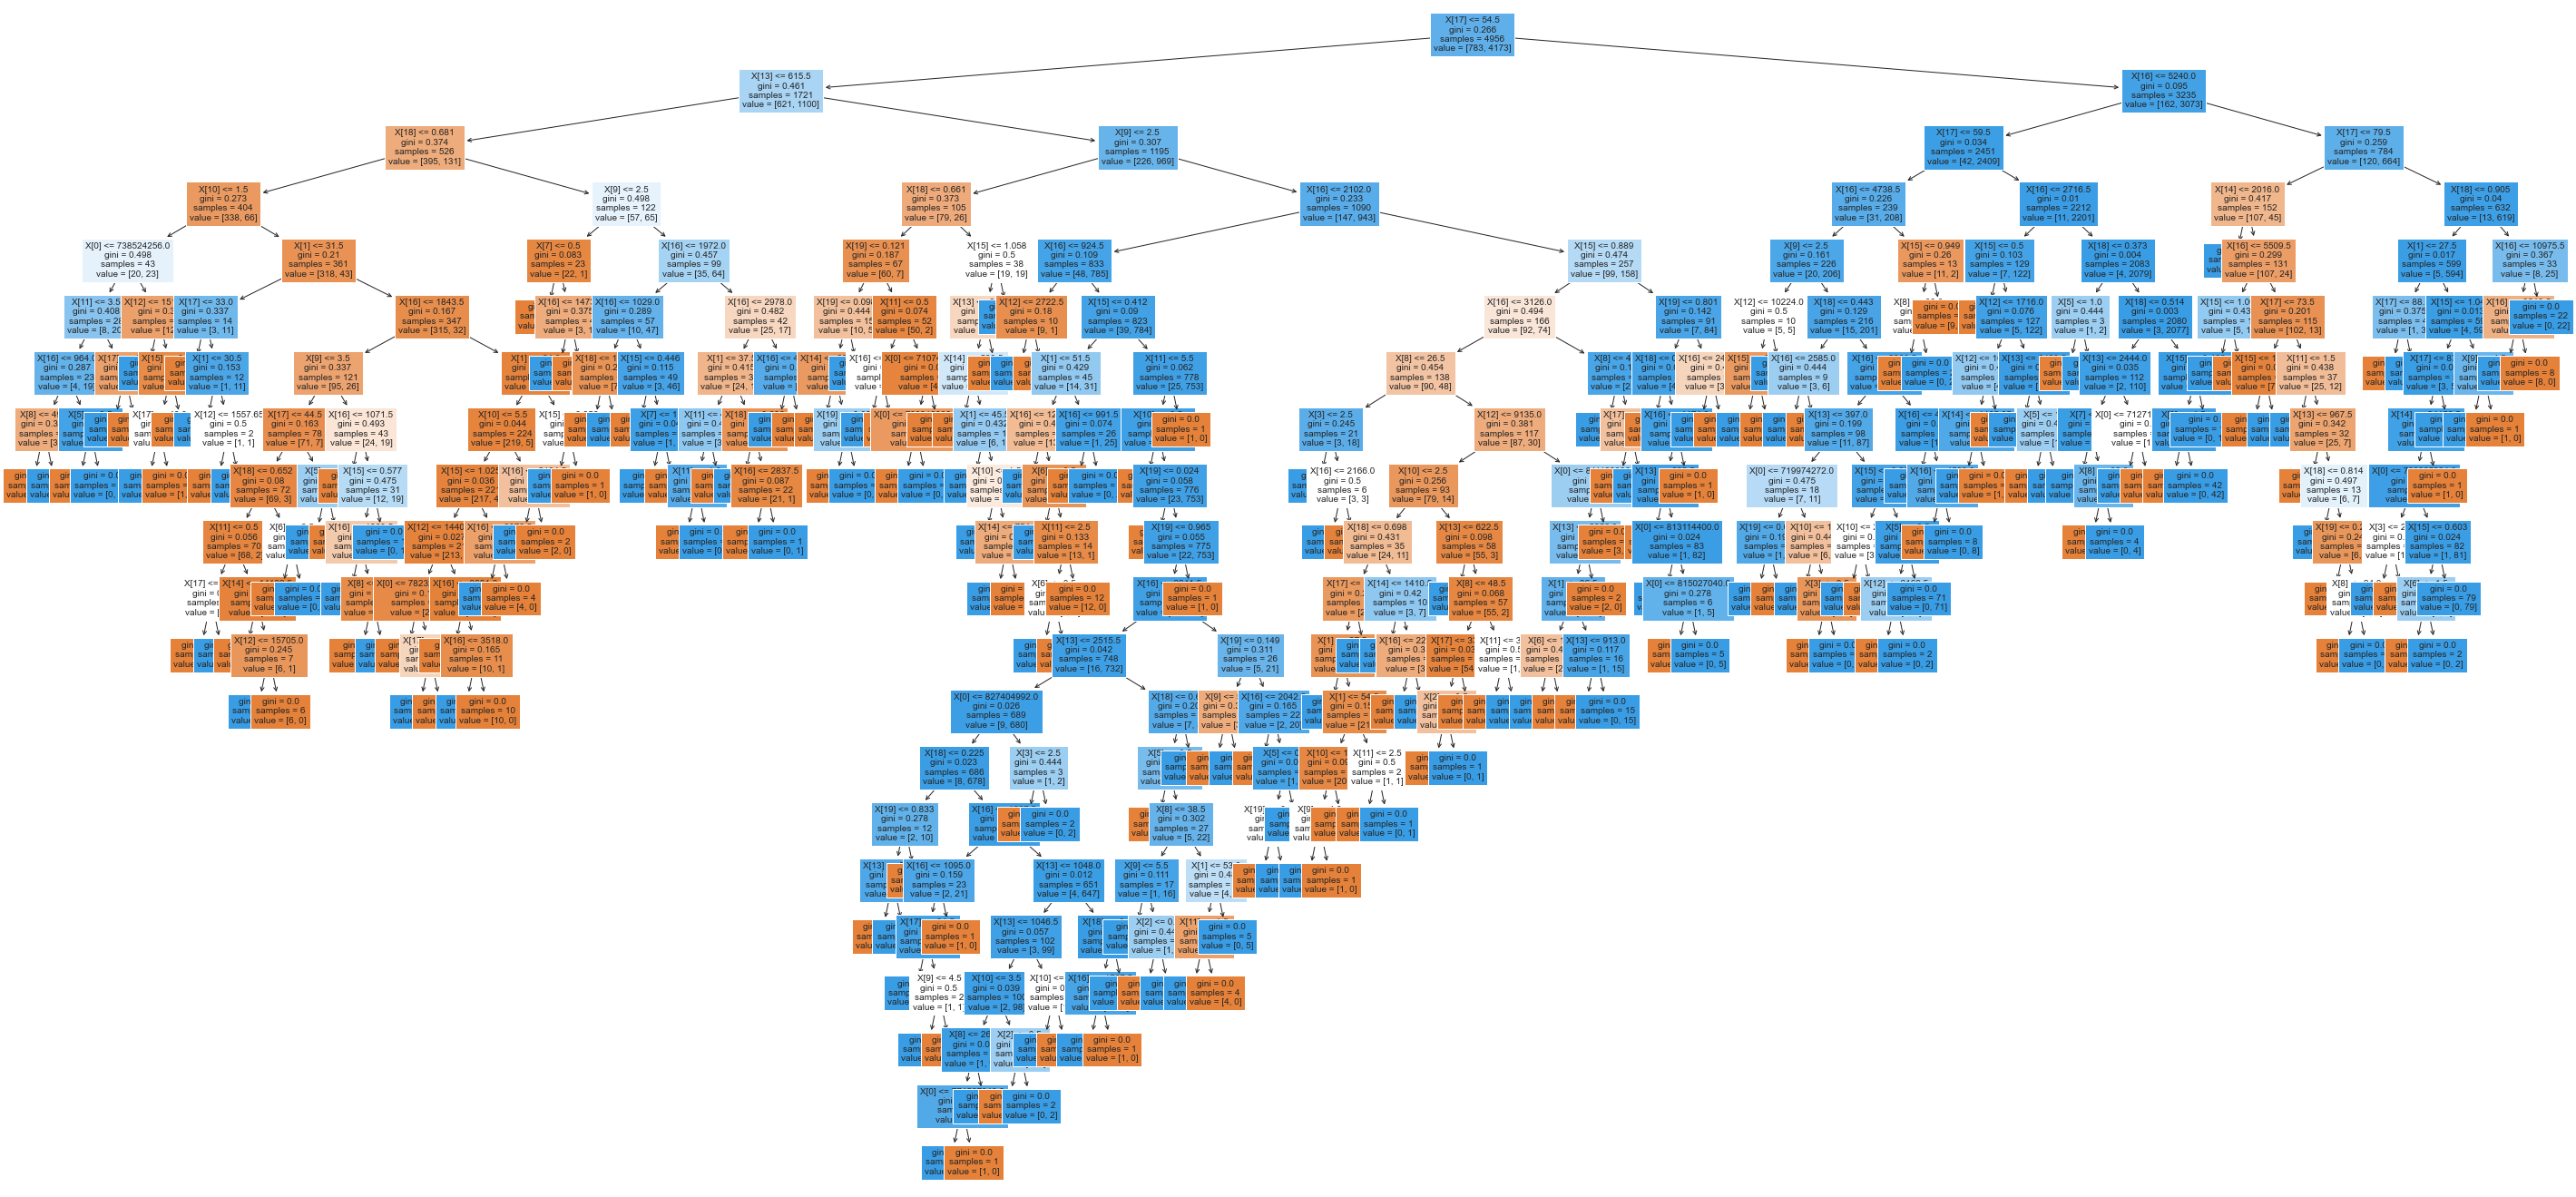

In [26]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree_cart',dpi=100)
plt.show()

In [27]:
#Tân làm Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
import time
from datetime import timedelta,date
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression





In [34]:
lr = LogisticRegression(max_iter=3300)
start_lr = time.time()
lr_pred = lr.fit(X_train, y_train).predict(X_test)
end_lr = time.time()
times_logistic_regression= timedelta(seconds = round(end_lr - start_lr,4)).total_seconds()
print("Time Logistic Regression (lr)",times_logistic_regression)
times['lr']

Time Logistic Regression (lr) 0.028


In [35]:
lr_score = metrics.accuracy_score(y_test, lr_pred)
accuracies_logistic_regression = lr_score
print("Accuracy", accuracies_logistic_regression)
print("Report", metrics.classification_report(y_test, lr_pred,labels=np.unique(lr_pred)))

Accuracy 0.8447058823529412
Report               precision    recall  f1-score   support

           1       0.84      1.00      0.92      1795

   micro avg       0.84      1.00      0.92      1795
   macro avg       0.84      1.00      0.92      1795
weighted avg       0.84      1.00      0.92      1795



In [ ]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(12,12))
sns.heatmap(lr_cm,annot=True, fmt=".3f", linewidths=.5, square =True, cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression Accuracy Score: {0}'. format(lr_score)
plt.title(title, size =15)